# Logistic Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data preparation

In [2]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)

In [3]:
df

,age,sex,income,married,children,car,mortgage,delays
0,48,FEMALE,17546.00,NO,1,NO,NO,YES
1,40,MALE,30085.10,YES,3,YES,YES,NO
2,51,FEMALE,16575.40,YES,0,YES,NO,YES
3,23,FEMALE,20375.40,YES,3,NO,NO,YES
4,57,FEMALE,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...
595,61,FEMALE,47025.00,NO,2,YES,YES,NO
596,30,FEMALE,9672.25,YES,0,YES,NO,YES
597,31,FEMALE,15976.30,YES,0,YES,NO,YES
598,29,MALE,14711.80,YES,0,NO,YES,YES


In [4]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [5]:
# Encoding categorical data
df = encoding_char(df)

In [6]:
df

,age,sex,income,married,children,car,mortgage,delays
0,48,0,17546.00,0,1,0,0,0
1,40,1,30085.10,1,3,1,1,1
2,51,0,16575.40,1,0,1,0,0
3,23,0,20375.40,1,3,0,0,0
4,57,0,50576.30,1,0,0,0,1
...,...,...,...,...,...,...,...,...
595,61,0,47025.00,0,2,1,1,1
596,30,0,9672.25,1,0,1,0,0
597,31,0,15976.30,1,0,1,0,0
598,29,1,14711.80,1,0,0,1,0


In [7]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['delays']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

## Feature Selection

In [9]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.287745
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.585     
Dependent Variable: delays           AIC:              290.2354  
Date:               2021-10-28 14:23 BIC:              319.4519  
No. Observations:   480              Log-Likelihood:   -138.12   
Df Model:           6                LL-Null:          -332.71   
Df Residuals:       473              LLR p-value:      5.9269e-81
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1       0.6471      0.2103    3.0771    0.0021     0.2349    1.0593
x2       0.0531      0.1549    0.3427    0.7318    -0.

In [10]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[ True False  True  True False False False]
[1 4 1 1 5 3 2]


## Model

In [22]:
# Leaving only Selected Features
X_train_select=X_train[:,[True, False,  True,  True, False, False, False]]
X_test_select=X_test[:,[True, False,  True,  True, False, False, False]]

array([[ 1.42607064,  0.78117911,  0.72374686],
       [ 0.0425155 , -0.87755313,  0.72374686],
       [-1.68692843, -0.92726642,  0.72374686],
       ...,
       [ 1.49524839,  1.90962864, -1.38169856],
       [-0.16501777,  0.7526753 ,  0.72374686],
       [ 1.21853736,  0.75233852,  0.72374686]])

In [23]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [24]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(2)

0.87

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  9]
 [ 7 47]]


## Visualising

In [26]:
# 2 features
X_train = X_train[:,[0,2]]
X_test = X_test[:,[0,2]]

In [27]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [28]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test).round(2)

0.88

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56 10]
 [ 4 50]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


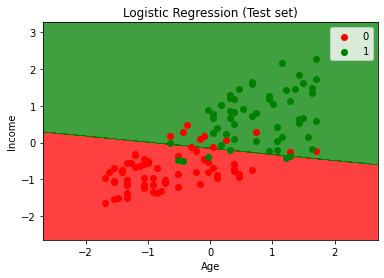

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

## Pickle

In [18]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [30]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('data3.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()